<a href="https://colab.research.google.com/github/danon6868/BI-ml-2024/blob/main/lecture_9_cnn/homework/hw_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$:
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F)
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [1]:
import torch
import numpy as np

In [ ]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])
print(M)


[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]


In [ ]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

#переводим в массив numpy
sobel_kernel_vert_np = sobel_kernel_vert.numpy()
sobel_kernel_hor_np = sobel_kernel_hor.numpy()

In [ ]:
def conv(x, kernel, stride, pad):
    # Добавляем паддинг
    x_padded = np.pad(x, pad, mode='constant')

    # Новый размер входного массива
    H, W = x_padded.shape
    K = kernel.shape[0]  # Размер ядра

    # Размер выходного массива
    H_out = 1 + (H - K) // stride
    W_out = 1 + (W - K) // stride

    # Инициализируем массив нулями
    out = np.zeros((H_out, W_out))

    # Проходимся сверткой по массиву
    for y in range(H_out):
        for x in range(W_out):
            # Область входного массива, над которой будет происходить свертка
            window = x_padded[y*stride:y*stride+K, x*stride:x*stride+K]
            # умножение и суммирование
            out[y, x] = np.sum(window * kernel)

    return out

In [ ]:
#тренировка
output_image = conv(M, sobel_kernel_vert_np, stride=1, pad=1)

output_image

array([[  6.,   6.,  -3.,  -3.,   6.,  -6.],
       [ 16.,   8.,  -4.,  -4.,   8., -16.],
       [ 19.,   8.,  -4.,  -4.,   8., -19.],
       [ 13.,   8.,  -4.,  -4.,   8., -13.],
       [ 16.,   8.,  -4.,  -4.,   8., -16.],
       [ 18.,   6.,  -3.,  -3.,   6., -18.]])

In [2]:
from skimage import data
import matplotlib.pyplot as plt

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


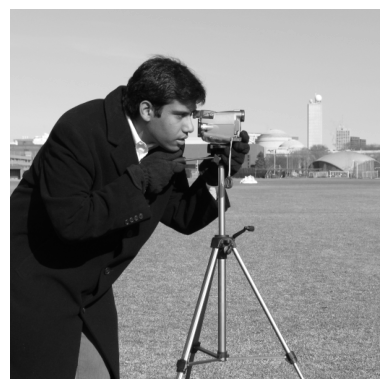

In [ ]:
camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");
print(camera)

Допишите код ниже и проинтерпретируйте полученный результат:

In [ ]:
camera_s_vert_filter = conv(camera, sobel_kernel_vert_np, stride=1, pad=1)

[[ 599.   -1.    1. ...    2.    2. -570.]
 [ 797.   -2.    3. ...    1.    1. -760.]
 [ 797.   -2.    2. ...    0.    0. -760.]
 ...
 [ 101.    6.   -5. ... -129.   38. -534.]
 [ 100.    6.   -3. ...  -42.   26. -556.]
 [  75.    5.   -1. ...   18.    6. -445.]]


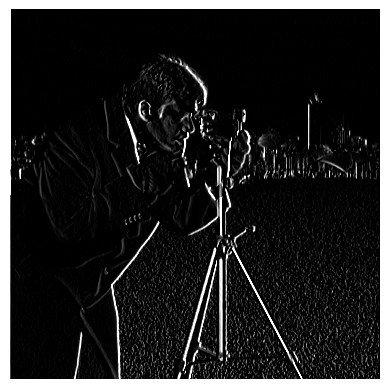

In [ ]:
plt.figure()
plt.imshow(camera_s_vert_filter.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");
print(camera_s_vert_filter) #применили фильтр,выделяющий вертикальные линии

In [ ]:
camera_s_hor_filter = conv(camera, sobel_kernel_hor_np, stride=1, pad=1)

[[ 599.  797.  797. ...  760.  760.  570.]
 [  -3.   -4.   -3. ...    3.    1.    0.]
 [   1.    2.    0. ...    0.    0.    0.]
 ...
 [  -1.   -2.   -1. ...  -31.   -8.   -2.]
 [   0.    0.    1. ...   22.   74.   34.]
 [ -75. -101. -101. ... -596. -608. -477.]]


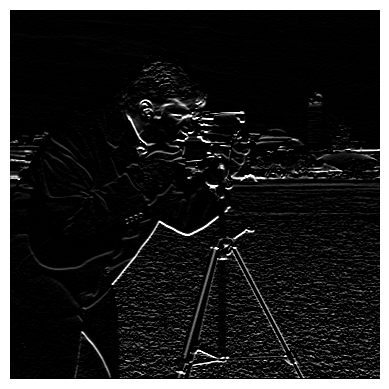

In [ ]:
plt.figure()
plt.imshow(camera_s_hor_filter.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");
print(camera_s_hor_filter) #применили фильтр,выделяющий горизонтальные линии

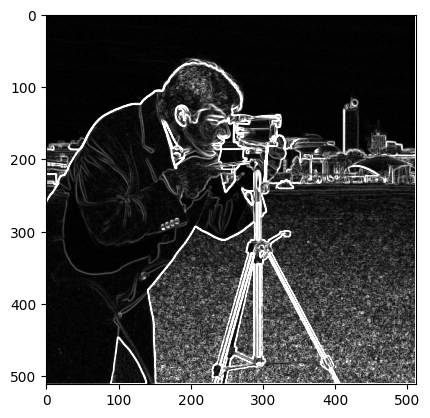

In [ ]:
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255); #применили два фильтра совместно

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [3]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 10 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip
clear_output()


In [6]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip
clear_output()

Archive:  train.zip
   creating: train/
   creating: train/healthy/
   creating: train/angular_leaf_spot/
   creating: train/bean_rust/
  inflating: train/healthy/healthy_train.265.jpg  
  inflating: train/healthy/healthy_train.271.jpg  
  inflating: train/healthy/healthy_train.259.jpg  
  inflating: train/healthy/healthy_train.99.jpg  
  inflating: train/healthy/healthy_train.311.jpg  
  inflating: train/healthy/healthy_train.66.jpg  
  inflating: train/healthy/healthy_train.72.jpg  
  inflating: train/healthy/healthy_train.305.jpg  
  inflating: train/healthy/healthy_train.339.jpg  
  inflating: train/healthy/healthy_train.113.jpg  
  inflating: train/healthy/healthy_train.107.jpg  
  inflating: train/healthy/healthy_train.106.jpg  
  inflating: train/healthy/healthy_train.112.jpg  
  inflating: train/healthy/healthy_train.338.jpg  
  inflating: train/healthy/healthy_train.73.jpg  
  inflating: train/healthy/healthy_train.304.jpg  
  inflating: train/healthy/healthy_train.310.jpg  
 

In [7]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)

        transformed_img = self._transforms_for_plot(image)

        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]

        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [8]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [9]:
num_classes = len(train_dataset.class_dir) #Количество классов получим

In [10]:
num_classes

3

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

In [11]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)

fig.suptitle("Bean dataset", fontsize=16);

Output hidden; open in https://colab.research.google.com to view.

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

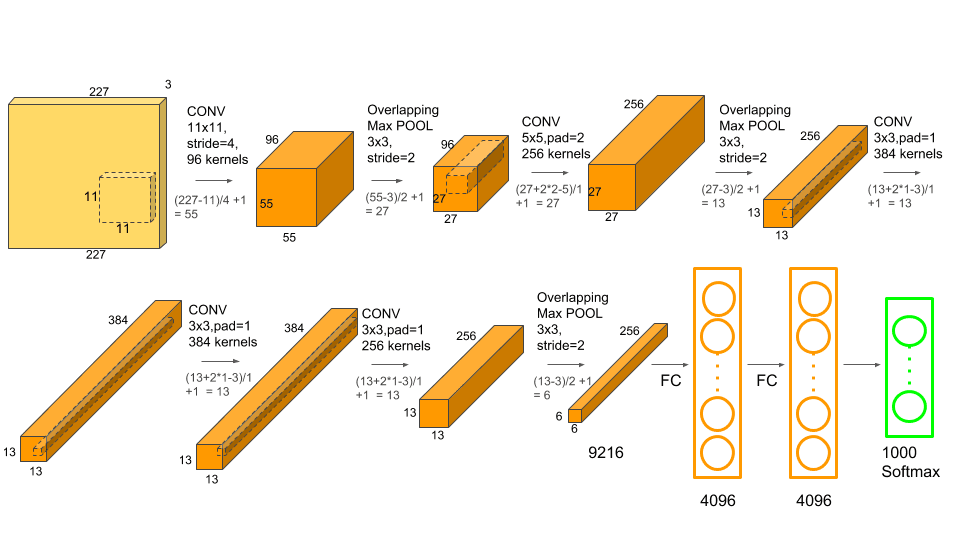

In [12]:
N_CLASSES = 3 # определите число классов в данных

LEARNING_RATE = 3e-4 # можно подобрать как-то другой)

In [13]:
import torch
import torch.nn as nn

In [26]:


class AlexNet(nn.Module):
    def __init__(self, num_classes=3):
        super(AlexNet, self).__init__()
        self.feature_extractor  = nn.Sequential(
            # Сверточные слои
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.classifier = nn.Sequential(

            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)

        return logits, probs


Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [27]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """

    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model -
    dataloader -
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total

    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [28]:
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

08:29:58 --- Epoch: 0	Train loss: 1.1120	Valid loss: 1.0925	Train accuracy: 52.03	Valid accuracy: 47.37
08:34:05 --- Epoch: 1	Train loss: 1.1106	Valid loss: 1.1004	Train accuracy: 33.37	Valid accuracy: 33.08
08:38:12 --- Epoch: 2	Train loss: 1.0997	Valid loss: 1.0980	Train accuracy: 33.37	Valid accuracy: 33.08
08:42:19 --- Epoch: 3	Train loss: 1.0949	Valid loss: 1.0623	Train accuracy: 50.77	Valid accuracy: 52.63
08:46:26 --- Epoch: 4	Train loss: 1.0477	Valid loss: 1.0106	Train accuracy: 48.74	Valid accuracy: 50.38
08:50:31 --- Epoch: 5	Train loss: 0.9642	Valid loss: 0.8635	Train accuracy: 66.15	Valid accuracy: 69.92
08:54:37 --- Epoch: 6	Train loss: 0.8740	Valid loss: 0.7847	Train accuracy: 68.67	Valid accuracy: 66.17
08:58:43 --- Epoch: 7	Train loss: 0.7499	Valid loss: 0.7625	Train accuracy: 69.05	Valid accuracy: 69.92
09:02:50 --- Epoch: 8	Train loss: 0.7510	Valid loss: 0.9346	Train accuracy: 58.70	Valid accuracy: 59.40
09:06:55 --- Epoch: 9	Train loss: 0.7944	Valid loss: 0.6780	Trai

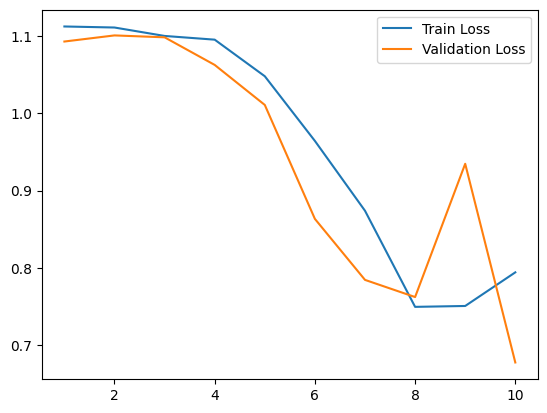

In [29]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

In [ ]:
#75.19

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

In [30]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))

    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))

    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"

    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

Output hidden; open in https://colab.research.google.com to view.

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

In [8]:
from IPython.display import Image

Image(url='https://raw.githubusercontent.com/zhurkr/BI-ml-2024/zhhur_homework_9/lecture_9_cnn/homework/data/photo.jpg')


Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**

In [ ]:
#встреча одногруппников (картинка выше), сгенерированна ruDALL-E Malevich, так как на реальные встречи времени нет((
#изначально я подумала, что как плохо работает ruDALL-E Malevich, но потом подумала, что это как раз встреча студентов ИБ, вымотанных дедлайнами)))